# <center><font size="7"><font color=Black>Financial inclusion in Africa Partie 1 </font></center>

## <a id='1'> <font size="6"><center><font color="INDIANRED">Problématique</font>

Qui est le plus susceptible d'avoir un compte bancaire ? L'inclusion financière reste l'un des principaux obstacles au développement économique et humain en Afrique. Par exemple, au Kenya, au Rwanda, en Tanzanie et en Ouganda, seuls 9,1 millions d'adultes (soit 13,9 % de la population adulte) ont accès à un compte bancaire commercial ou l'utilisent. Traditionnellement, l'accès à un compte bancaire est considéré comme un indicateur d'inclusion financière. Malgré la prolifération de l'argent mobile en Afrique, et la croissance des technologies innovantes. Les banques continuent de jouer un rôle essentiel pour faciliter l'accès aux services financiers. L'accès à la banque permet aux ménages d'épargner et de faciliter les paiements tout en aidant les entreprises à améliorer leur solvabilité et leur accès à d'autres services financiers. Par conséquent, l'accès aux comptes bancaires est un facteur essentiel de la croissance économique à long terme.

## <a id='1'> <font size="6"><center><font color="INDIANRED">Importer les données</font>

In [9]:
#importer les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
df_train = pd.read_csv('Train_v2 (1).csv')
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# boucle pour afficher les valeurs uniques de chaque colonne
for i in df_train.columns:
    print(i,df_train[i].unique())
    print("********************************************************************************")

country ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
********************************************************************************
year [2018 2016 2017]
********************************************************************************
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
********************************************************************************
bank_account ['Yes' 'No']
********************************************************************************
location_type ['Rural' 'Urban']
********************************************************************************
cellphone_access ['Yes' 'No']
********************************************************************************
household_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
********************************************************************************
age_of_respondent [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18 

In [12]:
df_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Nous n'avons pas de valeurs manquantes

## <a id='2'> <font size="6"><center><font color="INDIANRED"> Comprendre les données</font>

<font color=400040> Dans ce projet, nous travaillons sur de données qui contiennent des informations sur  environ 33 610 personnes en Afrique de l'Est (Kenya,  Rwanda, Tanzanie et Ouganda) . Ces données ont été extraites de diverses études entre 2016 et 2017 .

 La problématique  machine learning :   
C'est un problème de classification de l'apprentissage automatique supervisé.
 Un modèle d'apprentissage automatique en vu prédire quels sont les individus les plus susceptibles avoir ou utiliser un compte bancaire:0 - Absence de Compte Bancaire /1 - Possède un Compte Bancaire


<br>- country : Pays ou l'étude a été faite

<br>- year : Année de l'étude

<br>- uniqueid : Identifiant unique de chaque individue

<br>- location_type : Milieu de vie Rural ou Urbain

<br>- cellphone_access : Acces au service de telephonie portable 

<br>- household_size : Nombre de personnes qui habite dans un domicil

<br>- age_of_respondent : Age de l'individue

<br>- gender_of_respondent : Genre de l'individue  Male, Female"

<br>- relationship_with_head : La relation de l'individue avec le responsable de domicil "Head of Household, Spouse, Child, Parent,  Other relative, Other non-relatives, Dont know"

<br>- marital_status: Etat civil de l'individue : Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Donâ€™t know"

<br>- education_level:Niveau d'etudes : No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA"

<br>- job_type : type d'emploie de l'individue : Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer"


<br>-Dans notre cas d'étude nous allons utiliser des outils de prédiction pour qu'on puisse prévoir qui est le plus susceptible d'avoir un compte bancaire.
    
  -Le secteurs bancaire comme d'ailleurs celui de la téléphonie mobile sont encore en plein essor. Mais dans certains pays comme en Afrique du Sud ou encore le Nigeria, la Cote d'Ivoire pour ne citer que ces pays là vous pouvez avoir la possibilité de trouver des banques qui offrent des service en ligne 
    
  -Nous allons utiliser les algorithmes de prédictions de classification suivant:
  Logistic Regression , XGBoost , RandomForest .

In [13]:
df_train.describe # distribution statistique

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [14]:
df_train.columns # quels sont nos caractéristiques

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [15]:
df_train.info() # info générales du dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## <a id='2'> <font size="6"><center><font color="INDIANRED"> Data Visualisation</font>

## <a id='2'> <font size="4"><font color="black"> chercher de valeurs aberrantes ou atypiques</font>

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


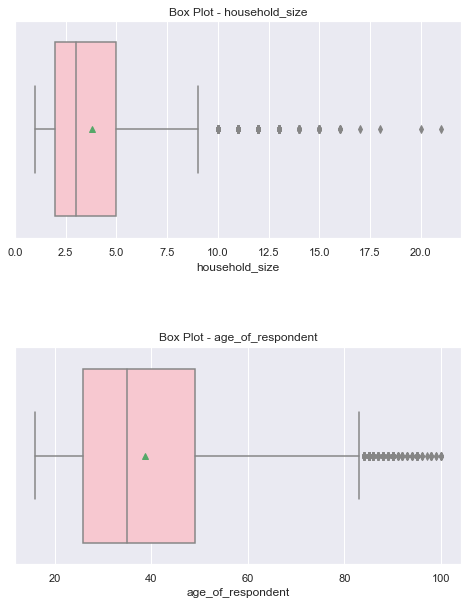

In [49]:
# Distribution de l'âge et de la taille des ménages

col_names =['household_size','age_of_respondent']

fig,ax = plt.subplots(len(col_names), figsize=(8,10))

for i,col_val in enumerate(col_names):
  sns.boxplot(df_train[col_val], showmeans=True, ax=ax[i],color="pink")
  ax[i].set_title('Box Plot - {}'.format(col_val))
   
plt.subplots_adjust(hspace=0.5)
plt.show()


<font color="Red"> On trouve beaucoup de valeurs atypiques (on va les garder) et pas de valeurs abérantes 

## <a id='2'> <font size="4"><font color="black"> Distributions des valeurs numériques </font>

## <a id='2'> <font size="4"><font color="black"> - Household size</font>

<function matplotlib.pyplot.xlim(*args, **kwargs)>

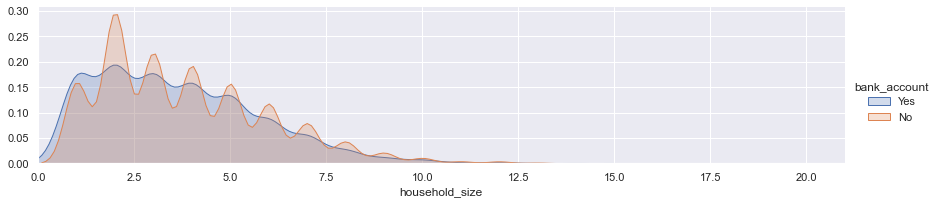

In [17]:
#Composition des foyer en fonction de si elles possèdent un compte bancaire ou pas

facet = sns.FacetGrid(df_train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'household_size', shade = True)
facet.set(xlim=(0,df_train['household_size'].max()))
facet.add_legend()
plt.xlim

Nous avons en majporité des foyer composés de deux personnes

## <a id='2'> <font size="4"><font color="black"> - Age </font>

<function matplotlib.pyplot.xlim(*args, **kwargs)>

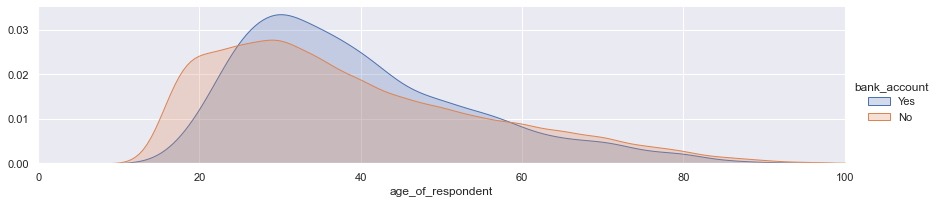

In [18]:
#distribution de l'âge en focntion de si oui ou non elles ont un compte bancaire

facet = sns.FacetGrid(df_train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'age_of_respondent', shade = True)
facet.set(xlim=(0,df_train['age_of_respondent'].max()))
facet.add_legend()
plt.xlim

On trouve plus de personnes qui sont entre 20 et 40 ans 

## <a id='2'> <font size="5"><center><font color="black"> Analyse Exploratoire </font>

## <a id='2'> <font size="4"><font color="black"> - bank_account </font>

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


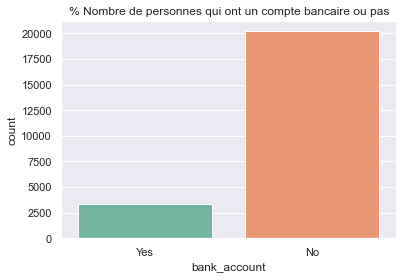

In [19]:
sns.countplot(df_train['bank_account'] ,palette = "Set2")
plt.title("% Nombre de personnes qui ont un compte bancaire ou pas");

 Nous observons un large déséquilibre entre ceux qui possèdent un compte et ceux qui n'en ont pas. 
    Ce qui pourrait biaiser notre analyse

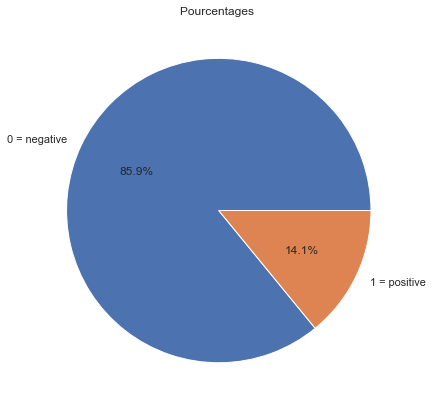

In [20]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df_train.bank_account.value_counts(), labels = ["0 = negative","1 = positive"], autopct='%1.1f%%' ) 
plt.title("Pourcentages ");

<font color="Red">85.9 % Negative (des personnes qui n'ont pas d'acces a un compte bancaire )
<br>14.1% Positive (les personnes qui ont acces a un compte bancaire )

## <a id='2'> <font size="4"><font color="black"> - Country </font>

Ratio de personne qui ont un compte bancaire ou pas par pays

In [21]:
pd.crosstab(df_train.bank_account,df_train.country, margins=True )

country,Kenya,Rwanda,Tanzania,Uganda,All
bank_account,,,,,
No,4547,7732,6013,1920,20212
Yes,1521,1003,607,181,3312
All,6068,8735,6620,2101,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


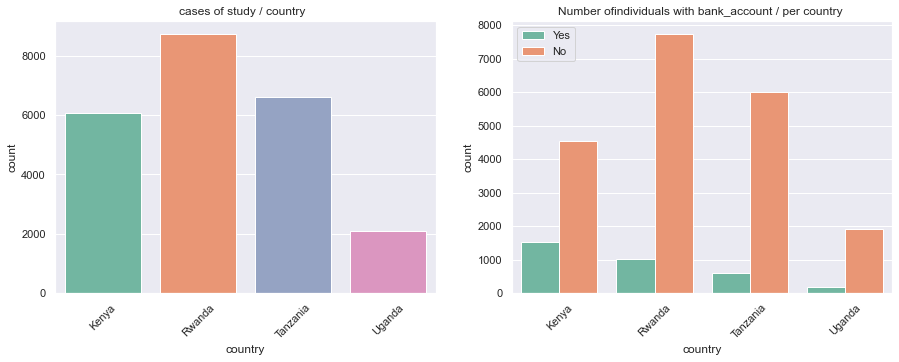

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['country'] ,palette = "Set2")
plt.title('cases of study / country  ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="country", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account / per country ')
plt.xticks(rotation=45);

<font color="Red">on a une majorités des cas étudiés a Rwanda par contre on trouve plus de gens qui ont des comptes bancaires en Kenya 
    
    Nous avons un potentiel de marché inexploité tant il y a personnes sans compte bancaire

## <a id='2'> <font size="4"><font color="black"> - location_type </font>

In [23]:
pd.crosstab(df_train.bank_account,df_train.location_type, margins=True )

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


Une très grande majorité de personnes qui vivent en zone rurale n'ont pas de compte bancaire, 

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


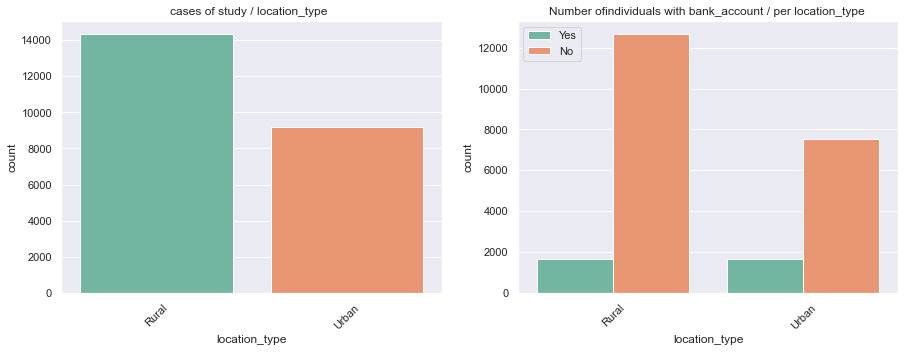

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['location_type'] ,palette = "Set2")
plt.title('cases of study / location_type  ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="location_type", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account / per location_type ')
plt.xticks(rotation=45);

<font color="Red">on a une majorité de personnes vivant en zone rurale mais pour les personnes qui ont un compte bancaire on voit pas une grande difference entre Rural et Urbain
    
    ces propos sont à nuancer car nous avons plus de personnes en zone rurale au Rwanda représenté dans notre dataset

## <a id='2'> <font size="4"><font color="black"> - relationship_with_head </font>

Relation avec le chef/fe des ménages et si oui ou non  en possession d'un compte bancaire

In [25]:
pd.crosstab(df_train.bank_account,df_train.relationship_with_head, margins=True )

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse,All
bank_account,,,,,,,
No,2036,10558,170,602,1021,5825,20212
Yes,193,2273,20,66,65,695,3312
All,2229,12831,190,668,1086,6520,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


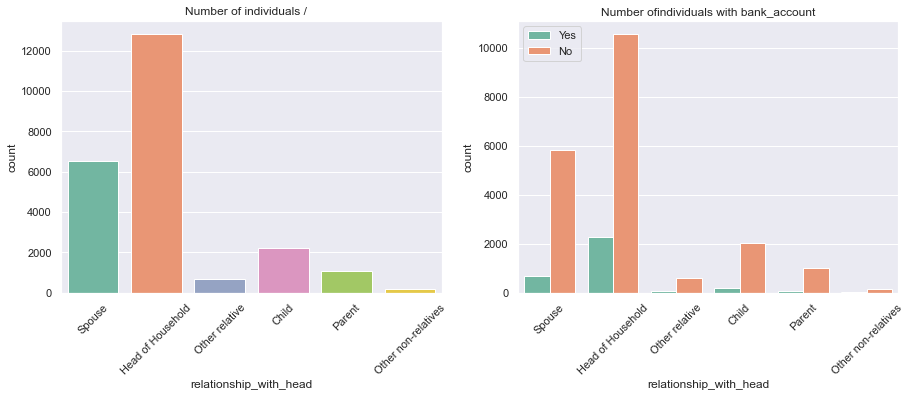

In [50]:
# distribution du type de realtion avec le oou la chef/fe de famille
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['relationship_with_head'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="relationship_with_head", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red">la majorité des gens qui on un compte bancaire  "Head of household" sont des chefs/ffes de famille 

## <a id='2'> <font size="4"><font color="black"> - cellphone_access </font>

In [27]:
pd.crosstab(df_train.bank_account,df_train.cellphone_access, margins=True )

cellphone_access,No,Yes,All
bank_account,,,
No,5966,14246,20212
Yes,104,3208,3312
All,6070,17454,23524


Nous constatons 3/4 des individus  ont un téléphone sans avoir de compte en banque, 

ce qui là encore prouve qu'il y a un véritable potentiel de développement financier (digital)


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


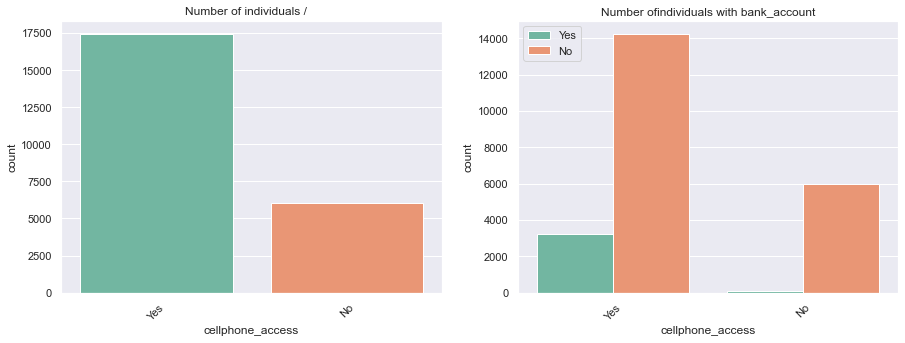

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['cellphone_access'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="cellphone_access", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red">la majorité des gens qui on un compte bancaire ont des telephones mobiles

## <a id='2'> <font size="4"><font color="black"> - gender_of_respondent </font>

In [29]:
pd.crosstab(df_train.bank_account,df_train.gender_of_respondent, margins=True )

gender_of_respondent,Female,Male,All
bank_account,,,
No,12395,7817,20212
Yes,1482,1830,3312
All,13877,9647,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


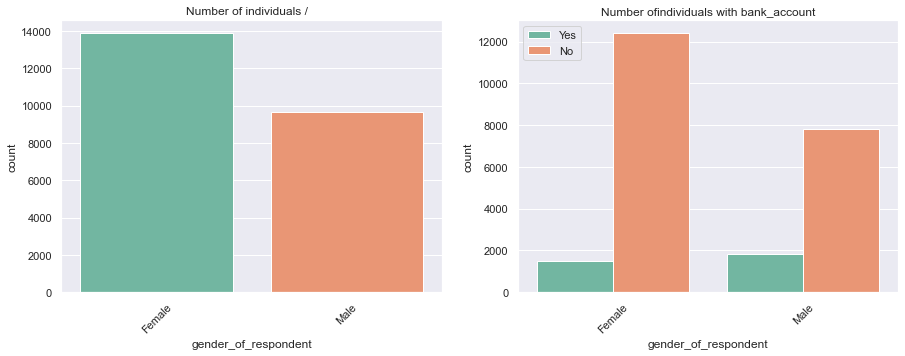

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['gender_of_respondent'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="gender_of_respondent", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red">on a une majorités des cas étudiés sont des femmes  par contre on trouve plus d' hommes  détenteurs d'un comptes bancaire

## <a id='2'> <font size="4"><font color="black"> - marital_statuse </font>

In [31]:
pd.crosstab(df_train.bank_account,df_train.marital_status, margins=True )

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,All
bank_account,,,,,,
No,1842,6,8883,7017,2464,20212
Yes,234,2,1866,966,244,3312
All,2076,8,10749,7983,2708,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


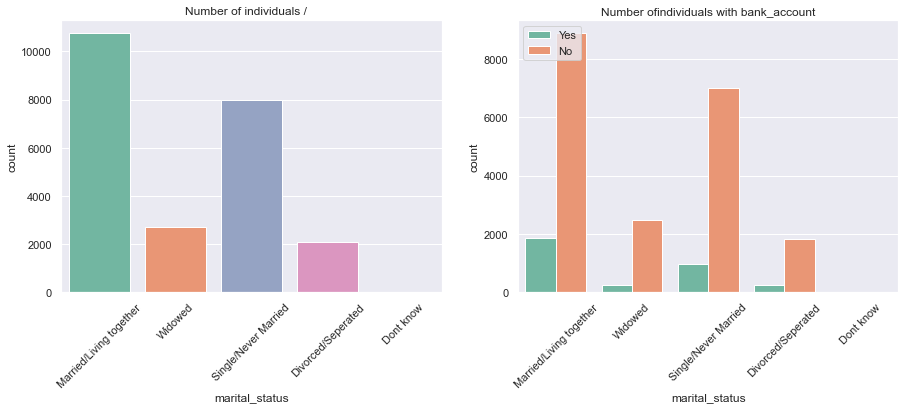

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['marital_status'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="marital_status", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red">Nous observons deux grands groupes de personnes avec un compte bancaire
    , les personnes mariés et les personnes seules/ jamais mariés  ont

## <a id='2'> <font size="4"><font color="black"> - education_level </font>

In [33]:
pd.crosstab(df_train.bank_account,df_train.education_level, margins=True )

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
bank_account,,,,,,,
No,4339,24,11698,3240,566,345,20212
Yes,176,11,1093,983,591,458,3312
All,4515,35,12791,4223,1157,803,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


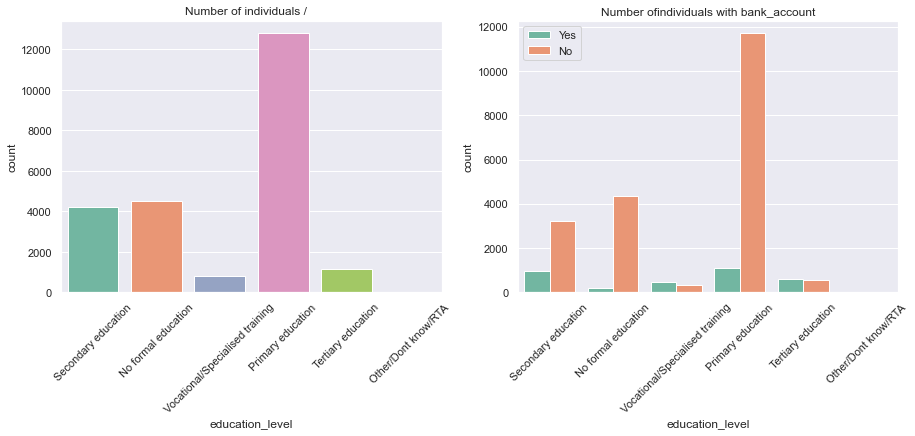

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['education_level'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="education_level", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red">la majorité des gens qui on un compte bancaire ont le niveau scolaire le plus elevé dans cette étude

## <a id='2'> <font size="4"><font color="black"> - job_type </font>

In [35]:
pd.crosstab(df_train.bank_account,df_train.job_type, margins=True )

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
bank_account,,,,,,,,,,,
No,112,4806,87,484,197,5152,614,884,2287,5589,20212
Yes,14,635,300,571,50,445,13,196,240,848,3312
All,126,5441,387,1055,247,5597,627,1080,2527,6437,23524


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


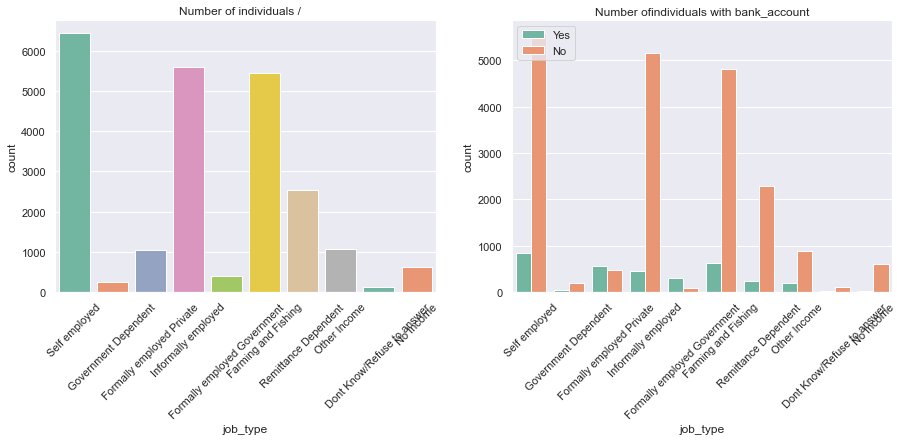

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['job_type'] ,palette = "Set2")
plt.title('Number of individuals /   ')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.countplot(x="job_type", hue="bank_account", data=df_train ,palette = "Set2")
plt.legend(loc='upper left')
plt.title('Number ofindividuals with bank_account')
plt.xticks(rotation=45);

<font color="Red"> Les personnes qui présentent le plus haut ratio de possession de copte bancaire sont celles qui sont 'government dependent', et les personnes à leur compte

## <a id='2'> <font size="6"><center><font color="INDIANRED"> Data Preprocessing</font>

## <a id='2'> <font size="5"><center><font color="black"> features Engineering </font>

In [37]:
#copier les data frame dans des nouveaux variables
train_data = df_train.copy()


In [38]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [39]:
# Convertir le target a une valeur numerique binaire 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [40]:
# Convertir les valeures numerqiue a des floats
float_array = train_data[['household_size', 'age_of_respondent', 'year']].values.astype(float)


In [41]:
# One Hot Encoding conversion pour les variables non numerique a plusieurs valeurs (non binaires)
categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country']
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)


In [42]:
# Labelncoder pour les variables avec des valeurs binaires
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])


In [43]:
train_data.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,1,0,1,3,24,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,0,5,70,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,1,0,...,0,1,0,0,0,0,1,0,0,0


In [44]:
train_data.shape

(23524, 39)

In [45]:
train_data.to_csv("./train_data.csv", sep=",") #exportation du csv avec les modifications pour entrainer nos modeles